In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import sys
import datetime

In [3]:
path = os.path.join("C:\\", "GENIE2K", "QAFILES")
path = os.getcwd()

In [92]:
def get_data(file ):
    
    cryo_df = pd.read_csv(os.path.join(path, file))
    cryo_df["Date/Time"] = pd.to_datetime(cryo_df["Date/Time"])
    cryo_df.keys()
    return cryo_df

def get_limit_data(cryo_df, start_date, end_date):
    meas_df = cryo_df.loc[(cryo_df["Date/Time"]>start_date) & (cryo_df["Date/Time"]<=end_date), cryo_df.keys()]
    return meas_df

def plot_measr_limiting(inv_key, meas_df, cryo_df, rej_lim=0.5, use_rej=True, plt_base="cryo", outer_percent=0.1):
    
    #cryo_df.plot(x="Date/Time", y=' Decay corr. act- 59.5keV')
    key_mn = meas_df[inv_key].mean()
    key_std = meas_df[inv_key].std()
    key_std / key_mn
    #key_std = 0.01 * key_mn
    key_std / key_mn
    plt_bound = (key_mn * (1-.25), key_mn * (1+.25))    

    
    if (use_rej):
        l_bound = key_mn * (1-rej_lim)
        u_bound = key_mn * (1+rej_lim)
        meas_df = meas_df.loc[(meas_df[inv_key] > l_bound) & (meas_df[inv_key]<=u_bound), meas_df.keys()]    
    

    fig, ax = plt.subplots(figsize=(20,10))

    cryo_df.plot(x="Date/Time", y=inv_key, linestyle="none", marker='o', ax=ax, markersize=10)
    
    ax.plot(cryo_df["Date/Time"], key_mn * np.ones(len(cryo_df)), label="Early Mean")
    ax.plot(cryo_df["Date/Time"], (1+outer_percent)*key_mn * np.ones(len(cryo_df)), color="tab:purple", label="Outer {}%".format(outer_percent*100))
    ax.plot(cryo_df["Date/Time"], (1-outer_percent)*key_mn * np.ones(len(cryo_df)), color="tab:purple",  label="Outer {}%".format(outer_percent*100))


    ax.fill_between(cryo_df["Date/Time"].values, 
                     key_mn * np.ones(len(cryo_df))+3*key_std * np.ones(len(cryo_df)),
                     key_mn * np.ones(len(cryo_df))-3*key_std * np.ones(len(cryo_df)),
                     interpolate=True,
                     alpha=0.1
                    )
    ax.fill_between(cryo_df["Date/Time"].values, 
                     key_mn * np.ones(len(cryo_df))+2*key_std * np.ones(len(cryo_df)),
                     key_mn * np.ones(len(cryo_df))-2*key_std * np.ones(len(cryo_df)),
                     interpolate=True,
                     alpha=0.1
                    )
    cryo_df[(cryo_df[inv_key] >= (3*key_std + key_mn)) | (cryo_df[inv_key] <= (key_mn - 3*key_std))].plot(
        x="Date/Time", y= inv_key, marker='o', linestyle='--', color='red', ax=ax, alpha=0.5,label=">=3 $\sigma$")
    ax.plot()
    #ax.set_ylim(plt_bound)
    ax.legend()
    ax.set_title(start + " - " + end + "\n" +file + " - Limited on Measurement Period\n" + inv_key +
                 "\n 1$\sigma$ (%)= {:2.2f}".format((key_std / key_mn*100)) + 
                 ", mean = {:2.4e}".format(key_mn) + ", N = {}".format(len(cryo_df)), fontsize=20)
    title = plt_base + "measr_limited" + inv_key + ".png"
    plt.tight_layout()
    plt.savefig(title)
    return cryo_df.loc[(cryo_df[inv_key] >= (3*key_std + key_mn)) | (cryo_df[inv_key] <= (key_mn - 3*key_std))]

def plot_full_limiting(inv_key, cryo_df, rej_lim=0.5, use_rej=True, plt_base="cryo", save_plt=False):
    
    key_mn = cryo_df[inv_key].mean()
    key_std = cryo_df[inv_key].std()
    key_std / key_mn
    key_std = 0.01 * key_mn
    key_std / key_mn
    plt_bound = (key_mn * (1-.25), key_mn * (1+.25))
    fig, ax = plt.subplots(figsize=(20,10))    
    
    if (use_rej):
        l_bound = key_mn * (1-rej_lim)
        u_bound = key_mn * (1+rej_lim)
        cryo_df = cryo_df.loc[(cryo_df[inv_key] > l_bound) & (cryo_df[inv_key]<=u_bound), cryo_df.keys()]
    
    


    cryo_df.plot(x="Date/Time", y=inv_key, linestyle="none", marker='x', ax=ax)
    ax.plot(cryo_df["Date/Time"], key_mn * np.ones(len(cryo_df)), label="Early Mean")



    ax.fill_between(cryo_df["Date/Time"].values, 
                     key_mn * np.ones(len(cryo_df))+3*key_std * np.ones(len(cryo_df)),
                     key_mn * np.ones(len(cryo_df))-3*key_std * np.ones(len(cryo_df)),
                     interpolate=True,
                     alpha=0.5
                    )
    ax.fill_between(cryo_df["Date/Time"].values, 
                     key_mn * np.ones(len(cryo_df))+2*key_std * np.ones(len(cryo_df)),
                     key_mn * np.ones(len(cryo_df))-2*key_std * np.ones(len(cryo_df)),
                     interpolate=True,
                     alpha=0.5
                    )
    cryo_df[(cryo_df[inv_key] >= (3*key_std + key_mn)) | (cryo_df[inv_key] <= (key_mn - 3*key_std))].plot(
        x="Date/Time", y= inv_key, marker='o', linestyle='--', color='red', ax=ax, alpha=0.5, label=">=3 $\sigma$")
    ax.plot()
    ax.set_ylim(plt_bound)
    ax.legend()
    ax.set_title(str(cryo_df["Date/Time"].iloc[0]) + " - " + str(cryo_df["Date/Time"].iloc[-1]) + "\n" +file + " - Full Range\n" + inv_key +
                 "\n 1$\sigma ($)= {:2.2e}".format(str(key_std / key_mn)) + 
                 ", mean = {:2.4e}".format(key_mn), fontsize=20)
    #cryo_df["rej_val"] = inv_key
    title = plt_base + "full_limited" + inv_key + ".png"
    plt.tight_layout()
    if (save_plt):
        plt.savefig(title)
    else:
        plt.show()
    return cryo_df.loc[(cryo_df[inv_key] >= (3*key_std + key_mn)) | (cryo_df[inv_key] <= (key_mn - 3*key_std))]

In [93]:
start = "10/06/2021 12:00:00 AM"
end = "12/22/2022 12:00:00 PM"

# start = "10/06/2021 12:00:00 AM"
# end = "11/19/2021 12:00:00 PM"
start_date = datetime.datetime.strptime(start, "%m/%d/%Y %I:%M:%S %p")
end_date = datetime.datetime.strptime(end, "%m/%d/%Y %I:%M:%S %p")

inv_keys = [' Decay corr. act- 59.5keV',
       ' Decay corr. act- 662keV', ' Decay corr. act- 1333keV']

fle = ["2021CryoccCup_LIQC.qaf.csv", "2021RegeccCup_LIQC.qaf.csv"]
fle = ["Buttonsource400.QAF.csv"]
plt_bases = ["ISOCS"]

In [94]:
use_idx = 0

file = fle[use_idx]
raw_data = get_data(file)
mesr_data = get_limit_data(raw_data, start_date, end_date)



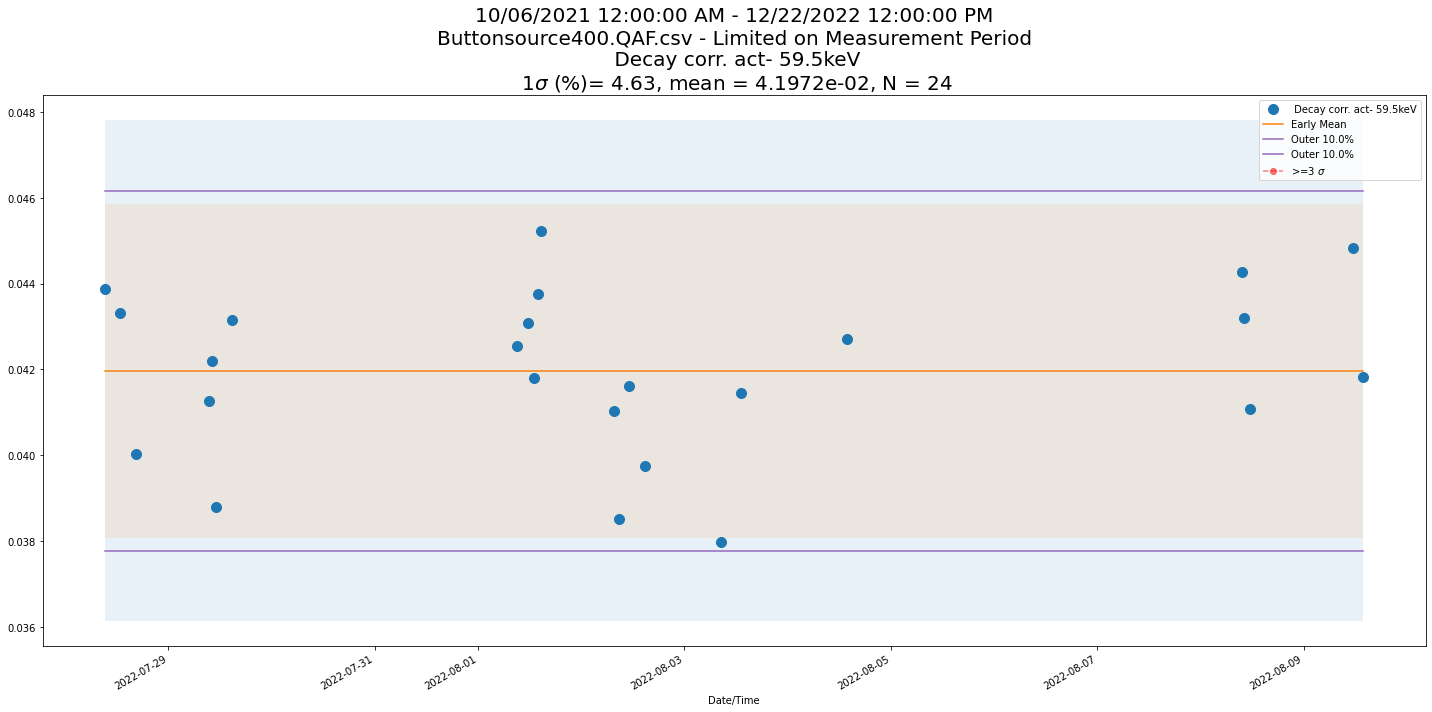

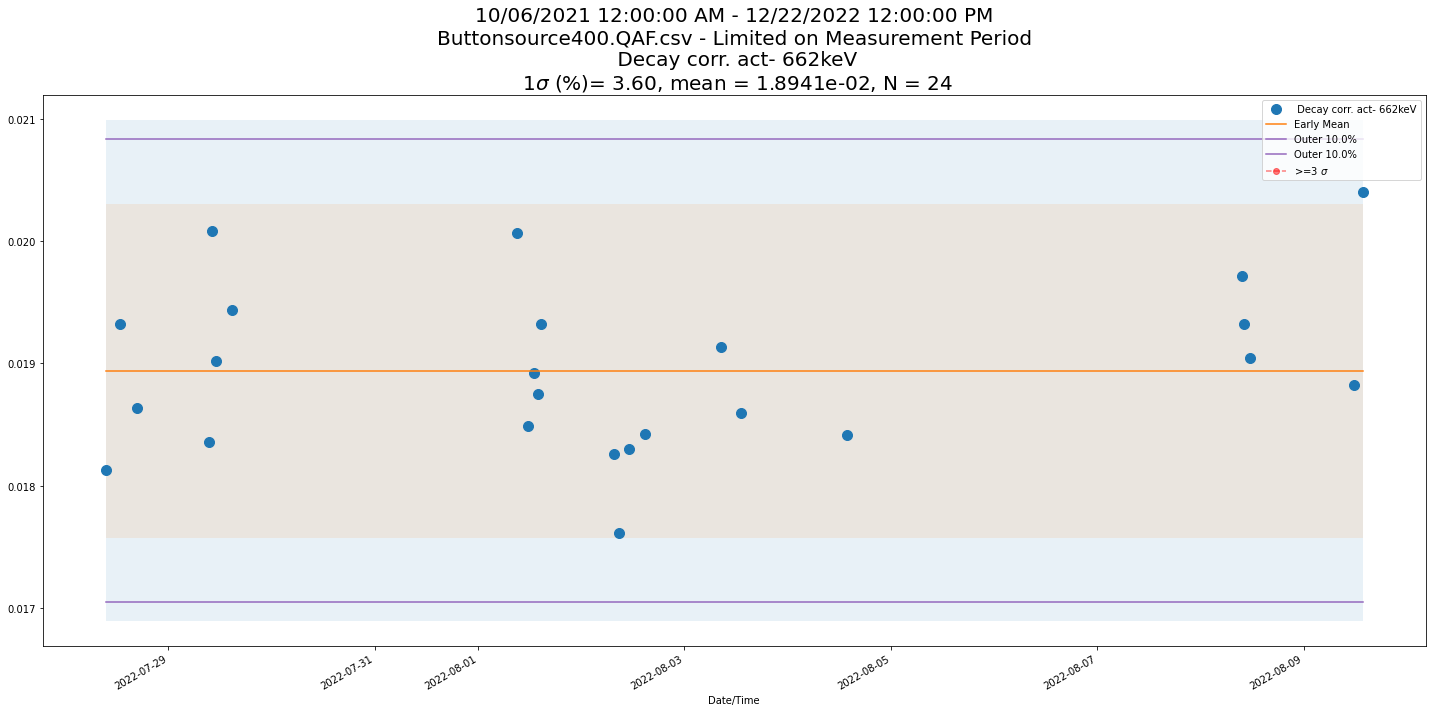

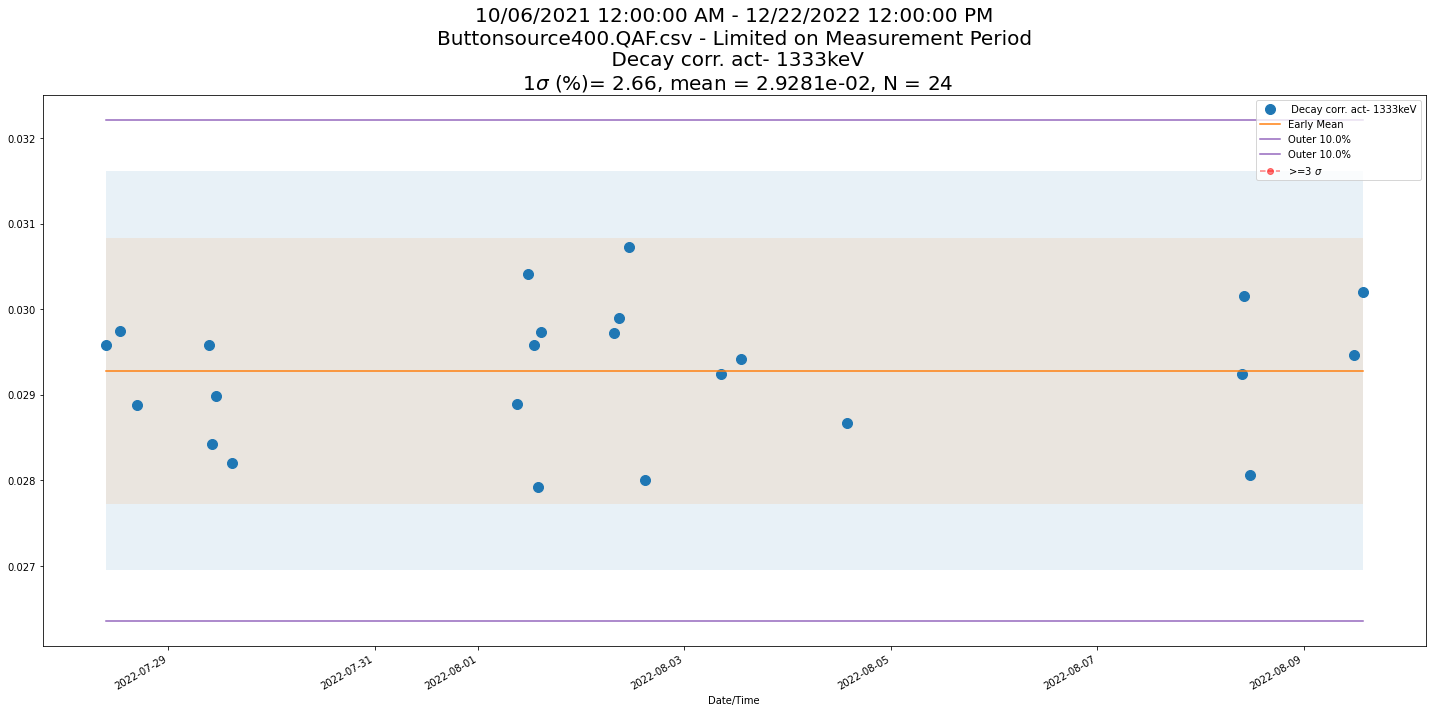

In [95]:
date_measr = []
dates_full = []
measr_full = pd.DataFrame(columns=mesr_data.keys())
for inv_key in inv_keys:
    date_measr = plot_measr_limiting(inv_key, mesr_data, raw_data, rej_lim=.1, use_rej=True, plt_base=plt_bases[use_idx])
    # measr_full = measr_full.append(plot_full_limiting(inv_key, raw_data, rej_lim=1, use_rej=True, plt_base=plt_bases[use_idx]))
 

In [177]:
measr_full.sort_values("Date/Time").groupby("Date/Time").mean().to_csv(plt_bases[use_idx]+"bad_points.csv")

In [24]:
raw_data[inv_keys[0]].mean()

0.033577340666666664

In [ ]:
((cryo_df[inv_key] / cryo_df[inv_key].mean() - 1) * 100).hist(bins=50)

In [197]:
cert = [{"Isotope":"Am-241", "Energy":59.5, "Activity_Bq":3.632e3, "Unc_Pct_k2":3.6},
{"Isotope":"Cs-137", "Energy":662, "Activity_Bq":1.318e3, "Unc_Pct_k2":4.2},
{"Isotope":"Co-60", "Energy":1332, "Activity_Bq":2.162e3, "Unc_Pct_k2":3.9}]

In [199]:
df = pd.DataFrame(cert)

In [203]:
df["Act_uCi"] = df["Activity_Bq"] / 3.7e4
df["Act_uCi_low"] = df.apply(lambda x: x["Act_uCi"] *(1 - x["Unc_Pct_k2"]/100), axis=1)
df["Act_uCi_high"] = df.apply(lambda x: x["Act_uCi"] *(1 + x["Unc_Pct_k2"]/100), axis=1)

In [204]:
df

,Activity_Bq,Energy,Isotope,Unc_Pct_k2,Act_uCi,Act_uCi_low,Act_uCi_high
0,3632.0,59.5,Am-241,3.6,0.098162,0.094628,0.101696
1,1318.0,662.0,Cs-137,4.2,0.035622,0.034126,0.037118
2,2162.0,1332.0,Co-60,3.9,0.058432,0.056154,0.060711


In [211]:
cryo_set = pd.DataFrame([{"Isotope":"Am-241", "Energy":59.5, "Activity_uCi":9.6325e-2, "Unc_Pct_k2":2},
{"Isotope":"Cs-137", "Energy":662, "Activity_uCi":3.6226e-2, "Unc_Pct_k2":2},
{"Isotope":"Co-60", "Energy":1332, "Activity_uCi":5.8823e-2, "Unc_Pct_k2":2}])


,Activity_uCi,Energy,Isotope,Unc_Pct_k2
0,0.096325,59.5,Am-241,2
1,0.036226,662.0,Cs-137,2
2,0.058823,1332.0,Co-60,2


In [212]:
cryo_set["Ratio_to_True"] = cryo_set["Activity_uCi"] / df["Act_uCi"]

In [213]:
cryo_set

,Activity_uCi,Energy,Isotope,Unc_Pct_k2,Ratio_to_True
0,0.096325,59.5,Am-241,2,0.981284
1,0.036226,662.0,Cs-137,2,1.016967
2,0.058823,1332.0,Co-60,2,1.006684


In [214]:
rege_set = pd.DataFrame([{"Isotope":"Am-241", "Energy":59.5, "Activity_uCi":9.5561e-2, "Unc_Pct_k2":2},
{"Isotope":"Cs-137", "Energy":662, "Activity_uCi":3.7583e-2, "Unc_Pct_k2":2},
{"Isotope":"Co-60", "Energy":1332, "Activity_uCi":6.3483e-2, "Unc_Pct_k2":2}])

rege_set["Ratio_to_True"] = rege_set["Activity_uCi"] / df["Act_uCi"]
rege_set

,Activity_uCi,Energy,Isotope,Unc_Pct_k2,Ratio_to_True
0,0.095561,59.5,Am-241,2,0.973501
1,0.037583,662.0,Cs-137,2,1.055061
2,0.063483,1332.0,Co-60,2,1.086434


In [215]:
rege_re_set = pd.DataFrame([{"Isotope":"Am-241", "Energy":59.5, "Activity_uCi":9.4065e-2, "Unc_Pct_k2":2},
{"Isotope":"Cs-137", "Energy":662, "Activity_uCi":3.71657e-2, "Unc_Pct_k2":2},
{"Isotope":"Co-60", "Energy":1332, "Activity_uCi":6.26576e-2, "Unc_Pct_k2":2}])

rege_re_set["Ratio_to_True"] = rege_re_set["Activity_uCi"] / df["Act_uCi"]
rege_re_set

,Activity_uCi,Energy,Isotope,Unc_Pct_k2,Ratio_to_True
0,0.094065,59.5,Am-241,2,0.958261
1,0.037166,662.0,Cs-137,2,1.043347
2,0.062658,1332.0,Co-60,2,1.072309
